In [ ]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib import animation

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

#Particulas

###Datasets


In [ ]:
positions_history = np.load("particles_positions_history.npy")

### Plotagem


In [ ]:
def update(i):
  scat.set_offsets(positions_history[i])
  scat.set_array(colors)
  txt_title.set_text(f'Interação: {i+1}')
  return scat,

colors = np.ones(len(positions_history[0]))
colors[len(colors)-1] = 3

fig, ax = plt.subplots()
ax.set_xlim((0, np.max(positions_history[0])+3))
ax.set_ylim((0, np.max(positions_history[0])+3))
scat = ax.scatter([],[])

txt_title = ax.set_title('')

ani = animation.FuncAnimation(fig, update, frames=len(positions_history), interval=200, blit=True)
HTML(ani.to_html5_video())

-----


# Solution Space

In [ ]:
solution_space = np.load("solution_space.npy")
sol = solution_space.reshape((900, 60))
#fitness = [{"fitness": decode(ss), "solution": ss} for ss in sol]
#fitness = np.array([[decode(ss),[ss]] for ss in sol])
fitness = np.array([decode(ss) for ss in sol])
#np.save("fitness_solution", fitness)

plt.hist(fitness, bins=np.arange(fitness.min(), fitness.max()+1))

print(fitness.min()) #2
print(fitness.max()) #65
"""
hig_solution = []
low_solution = []
for s in sol:
  fit = decode(s)
  if fit < 12:
    low_solution.append(s)
  if fit > 65:
    hig_solution.append(s)
  #
#
#print(len(low_solution))
#print(len(hig_solution))
#np.save("low_solution_range.npy", low_solution)
#np.save("hig_solution_range.npy", hig_solution)
"""

NameError: ignored

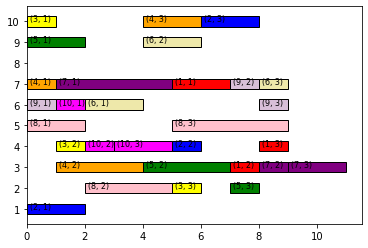

11

In [ ]:
hg = np.load("hig_solution_range.npy")
lw = np.load("low_solution_range.npy")
#decode(hg[0], True)
#decode(lw[0], True)

#f_hg = [{"fitness": decode(ss), "solution": ss} for ss in hg] #75, 66
#f_lw = [{"fitness": decode(ss), "solution": ss} for ss in lw] #10, 11, 9, 11
f_75 = hg[0]
f_66 = hg[1]
f_11 = lw[0]
f_12 = lw[1]
f_10 = lw[2]
f_09 = lw[3]

#decode(f_75, True)
#decode(f_66, True)
#decode(f_11, True)
#decode(f_12, True)
#decode(f_10, True)
decode(f_09, True)

In [ ]:
## Informations of execution
number_exec = 4

In [ ]:
class Teste:
  def __init__(self, data):
    self.data = data
#

#np.save("teste.npy", [Teste(1), Teste(2), Teste(3)])
#t = np.load("teste.npy", allow_pickle=True)

1
2
3


## Dados

In [ ]:
solution_space = np.load("solution_space3.npy")

NameError: ignored

## Plotagem

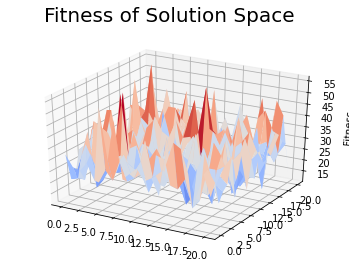

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx = np.arange(0, solution_space.shape[0])
yy = np.arange(0, solution_space.shape[0])

X, Y = np.meshgrid(xx, yy)
""" Make a list with fitness of all intens of solutions space """
Z = np.array([[decode(ss) for ss in s] for s in solution_space])

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True, rcount=800, ccount=800)
ax.set_zlabel('Fitness')
fig.suptitle('Fitness of Solution Space', fontsize=20)
plt.show()

------

# Codigos Auxiliares

### Encoder / Decoder Data

#### Encoder Data

In [ ]:
encoder_data = {
	"solution_space_size"       : 441,
	"quant_operations_per_jobs" : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
	"quant_of_jobs"             : 10,
	"quant_of_machines"         : 10,
	"half_of_scheduling"        : 30,
	"solution_size"             : 60,
	"process_times"             : np.load("encoder_process_times3.npy")
}

#### Decoder Data

In [ ]:
decoder_data = {
	"quant_of_jobs":             10,
	"quant_of_machines":         10,
	"quant_operations_per_jobs": [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
	"max_of_operations":         3,
	"half_of_scheduling":        30,
	"process_times":             np.load("decoder_process_times3.npy")
}

### Encode Function

In [ ]:
#Encode function

### Decode Function

In [ ]:
def decode(scheduling, plot_scheduling=False, fig=None):
  machines_matrix = np.zeros((decoder_data["quant_of_jobs"], decoder_data["max_of_operations"]), dtype=int)
  times_matrix    = np.zeros((decoder_data["quant_of_jobs"], decoder_data["max_of_operations"]), dtype=int)

  machines_scheduling   = scheduling[:decoder_data["half_of_scheduling"]]
  operations_scheduling = scheduling[decoder_data["half_of_scheduling"]:]

  operation_index = 0
  for i in range( decoder_data["quant_of_jobs"] ):
    for j in range( decoder_data["quant_operations_per_jobs"][i] ):
      count = 0
      process_time = decoder_data["process_times"][operation_index]

      for index in range( len(process_time) ):
        if process_time[index] != -1:
          count+=1

        if count == machines_scheduling[operation_index]:
          machines_matrix[i][j] = index+1
          times_matrix[i][j]  = process_time[index]
          break

      operation_index+=1

    #print(machines_matrix)
    #print(times_matrix)

  start_time = np.zeros(
    (decoder_data["quant_of_machines"], decoder_data["half_of_scheduling"]),
    dtype=int
  )

  end_time = np.zeros(
    (decoder_data["quant_of_machines"], decoder_data["half_of_scheduling"]),
    dtype=int
  )

  op_count_dict = {}
  machine_operations = np.zeros(decoder_data["quant_of_machines"], dtype=int)

  for os in operations_scheduling:
    if os in op_count_dict:
      op_count_dict[os] += 1
    else:
      op_count_dict[os] = 1
    #

    operation_count = op_count_dict[os]
    operation_index = find_one_operation_in_a_machine(os, operation_count)

    machine_number     = machines_matrix[os-1][operation_count-1]
    pro_time           = times_matrix [os-1][operation_count-1]

    machine_operation  = machine_operations[machine_number-1]
    current_start_time = start_time[machine_number-1][operation_index]
    current_end_time   = end_time  [machine_number-1][operation_index]

    previous_operation_index = find_one_operation_in_a_machine(os, operation_count - 1)
    previous_machine_number = machines_matrix[os-1][operation_count-2]

    if machine_operation == 0 and operation_count == 1 :
      current_start_time = 0
      current_end_time   = pro_time
    #

    elif machine_operation == 0 and operation_count > 1 :
      prev_m_num          = machines_matrix[os-1][operation_count-2]
      prev_end_time       = end_time[prev_m_num-1][previous_operation_index]
      current_start_time  = prev_end_time
      current_end_time    = prev_end_time + pro_time
    #

    elif machine_operation > 0:
      flag=0
      prev_end_time = 0

      if operation_count == 1 :
        free_start = 0
      else:
        prev_end_time = end_time[previous_machine_number-1][previous_operation_index]
        free_start = prev_end_time
      #

      order_start_time = np.sort(start_time[machine_number-1][end_time[machine_number-1] > 0])
      order_end_time   = np.sort(end_time  [machine_number-1][end_time[machine_number-1] > 0])

      for index in range(len(order_start_time)):
        if order_start_time[index] - free_start >= pro_time:
          current_start_time = free_start
          current_end_time   = free_start + pro_time
          flag = 1
          break
        #

        if order_end_time[index] - free_start >= 0:
          free_start = order_end_time[index]
        #
      #

      if flag == 0:
        free_start = max(np.max(end_time[machine_number-1]), prev_end_time)
        current_start_time = free_start
        current_end_time   = free_start + pro_time
      #
    #

    machine_operation += 1

    machine_operations[machine_number - 1]          = machine_operation
    start_time[machine_number - 1][operation_index] = current_start_time
    end_time  [machine_number - 1][operation_index] = current_end_time
  #

  #print(scheduling)
  if plot_scheduling:
    draw_gatt(start_time, end_time, fig)
  #

  fitness = np.max(end_time)

  return fitness
#

### Gantt Plot Function


In [ ]:
def draw_gatt(start_time, end_time, fig):
  colors = { 0:'red', 1:'blue', 2:'yellow', 3:'orange', 
    4:'green', 5:'palegoldenrod',6:'purple', 7:'pink', 
    8:'Thistle', 9:'Magenta',10:'SlateBlue', 11:'RoyalBlue', 
    12:'Cyan', 13:'Aqua',14:'floralwhite',15:'ghostwhite'
  }
  #ax = plt.figure()
  # i = Machine_index ; j = Operation_index
  for i in range( decoder_data["quant_of_machines"] ): # Vai de linha em linha do plot (começando do 0)
    for j in range( decoder_data["half_of_scheduling"] ):
      current_start_time      = start_time[i][j]
      current_end_time        = end_time[i][j]
      current_diference_time  = current_end_time - current_start_time
      #if current_diference_time > 0:
      if end_time[i][j] != 0 and end_time[i][j] - start_time[i][j] != 0:
        operation = find_machine_of_a_operation(j)
        bar_width = current_diference_time
        bar_left = current_start_time
        bar_color = colors[operation[0] - 1]
        #bar_str = operation[0] # Somente o numero do Job
        bar_str = operation     # Numero do Job e da Operação

        plt.barh(y=i, width=bar_width, height=0.5, left=bar_left, color=bar_color, edgecolor='black')
        plt.text(x=bar_left + 0.1, y=i, s=bar_str, fontsize=8)
  #
  #ax.yticks(np.arange(i + 1), np.arange(1, i + 2))
  plt.yticks(np.arange(i + 1), np.arange(1, i + 2))

  plt.show()
  pass
#

### Find Operation Function

In [ ]:
def find_one_operation_in_a_machine(i, j):
  if i == 1:
    op_index = j - 1
  else:
    op_index = sum(decoder_data["quant_operations_per_jobs"][:i - 1]) + j - 1

  return op_index


----

### Find Machine

In [ ]:
def find_machine_of_a_operation(operation_index):
  job_op_list = [
      (i + 1, j + 1) for i in range( decoder_data["quant_of_jobs"] ) for j in range(decoder_data["quant_operations_per_jobs"][i])
  ]
  job_op = job_op_list[operation_index]
  return job_op
#

----

#Testes

In [ ]:
for pos in data:
  x_coordinates = [x[0] for x in pos]
  y_coordinates = [x[1] for x in pos]
  plt.scatter(x_coordinates, y_coordinates)
  plt.show()

In [ ]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([10,20,30,40,50])
#arrm = (arr1 + arr2)/2
arrm = np.gradient([1, 3, 8, 10, 14])

print(arrm)

[2.  3.5 3.5 3.  4. ]


In [ ]:
innitial_position = np.array([31, 17])
g_best_vector     = np.array([24, 11])
p_best_vector     = np.array([30, 5])

median_best_vector = ((p_best_vector + g_best_vector)/2)


#inertia_vector = (innitial_position * 0.5)
final_vector = (median_best_vector * 0.5)
print(median_best_vector)
print(final_vector)

[27.  8.]
[13.5  4. ]


In [ ]:
ar = np.empty((900,24))
v = 30
br = ar.reshape(v,v,24)
#print(br)

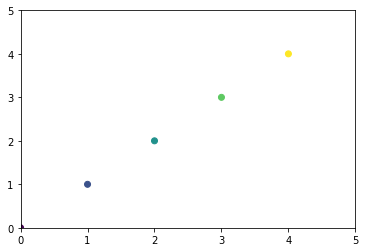

In [ ]:
def update(i):
  scat.set_offsets(l[i])
  return scat,

l = [[1,2],[3,2],[1,2],[3,2],[1,2],[3,2]]

fig, ax = plt.subplots()
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))
scat = ax.scatter([],[])
#scat.set_offsets([1,2,3],[1,2,3])
#scat.set_offsets([[1,1],[2,2],[3,3],[4,4],[5,5]])
scat.set_offsets([[i,i] for i in range(5)])
#scat.set_offsets([[4,4],[6,6]])
#scat.set_array([[4,4],[6,6]])
scat.set_array(np.array([i for i in range(5)]))
#ani = animation.FuncAnimation(fig, update, frames=5, interval=5, blit=True)
#HTML(ani.to_html5_video())

## Test Plot

In [ ]:
# create a figure and axes
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)   

# set up the subplots as needed
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
#line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
state1, = ax1.scatter([], [])
#line2, = ax1.plot([], [], 'r', lw=2)

ax1.legend(['sin','cos']);

In [ ]:
# create a figure and axes
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)   

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)

ax1.legend(['sin','cos']);

In [ ]:
# animation function. This is called sequentially
def drawframe(n):
  x = np.linspace(0, 2, 1000)

  y1 = np.sin(2 * np.pi * (x - 0.01 * n))
  line1.set_data(x, y1)

  y2 = np.cos(2 * np.pi * (x - 0.01 * n))
  line2.set_data(x, y2)

  txt_title.set_text('Frame = {0:4d}'.format(n))
  return (line1,line2)

In [ ]:
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

In [ ]:

HTML(anim.to_html5_video())

In [ ]:
def update(i):
  """Update the scatter plot."""
  #print(i)
  #print(l[i])
  scat.set_offsets(l[i])
  #data = next(stream)
  # Set x and y data...
  #scat.set_offsets(data)
  # Set sizes...
  #scat.set_sizes(300 * abs(data[:, 2])**1.5 + 100)
  # Set colors..
  #scat.set_array(data[:, 3])

  # We need to return the updated artist for FuncAnimation to draw..
  # Note that it expects a sequence of artists, thus the trailing comma.
  #return l[i],
  return scat,


#count = 0

#stream = data_stream()

#fig, ax = plt.subplots()
#fig = plt.figure(figsize=(5,5))
#ax = plt.subplot()

l = [[1,2],[3,2],[1,2],[3,2],[1,2],[3,2]]

fig, ax = plt.subplots()
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
#scat = ax.scatter([1,1],[3,3])
scat = ax.scatter([],[])
#scat.set_offsets([1,2,3],[1,2,3])
#scat.set_offsets([[1,1],[2,2]])
#scat.set_offsets([[4,4],[6,6]])
ani = animation.FuncAnimation(fig, update, frames=5, interval=5, blit=True)
HTML(ani.to_html5_video())